**# 1.Import The necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tmdb-movies.csv', encoding='latin-1')


In [3]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,6185,7.1,2015,137999939.3,3.481613e+08


In [4]:
df.shape

(3854, 15)

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

**# 2. Get info about the data like data type, number of null values, names of the columns**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   int64  
 1   imdb_id         3854 non-null   object 
 2   popularity      3854 non-null   float64
 3   budget          3854 non-null   int64  
 4   revenue         3854 non-null   int64  
 5   original_title  3854 non-null   object 
 6   cast            3850 non-null   object 
 7   director        3853 non-null   object 
 8   runtime         3854 non-null   int64  
 9   genres          3854 non-null   object 
 10  vote_count      3854 non-null   int64  
 11  vote_average    3854 non-null   float64
 12  release_year    3854 non-null   int64  
 13  budget_adj      3854 non-null   float64
 14  revenue_adj     3854 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 451.8+ KB


**# 3.Chech if there were any null values**

In [7]:
df.isnull().sum()

,0
id,0
imdb_id,0
popularity,0
budget,0
revenue,0
original_title,0
cast,4
director,1
runtime,0
genres,0


**# 4.Get percentage of the missing values in columns**

In [8]:
per_missing=df.isnull().sum()/len(df)*100
per_missing

,0
id,0.000000
imdb_id,0.000000
popularity,0.000000
budget,0.000000
revenue,0.000000
original_title,0.000000
cast,0.103788
director,0.025947
runtime,0.000000
genres,0.000000


**# 5.drop rows where any null values**

In [9]:
#drop row where null value
df=df.dropna(axis=0)
df.isnull().sum()

,0
id,0
imdb_id,0
popularity,0
budget,0
revenue,0
original_title,0
cast,0
director,0
runtime,0
genres,0


**# 6.drop duplicated values**

In [10]:
#discover duplicte
df.duplicated().sum()

np.int64(1)

In [11]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

**# 7.statistical measure**

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3848.000000,3848.000000,3.848000e+03,3.848000e+03,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03,3.848000e+03
mean,39892.488825,1.193023,3.725594e+07,1.078425e+08,109.219595,528.504418,6.168555,2001.257536,4.430211e+07,1.372665e+08
std,67256.087600,1.475804,4.222019e+07,1.766322e+08,19.916289,880.417954,0.794754,11.287022,4.481631e+07,2.162188e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6071.000000,0.463291,1.000000e+07,1.367686e+07,95.000000,71.000000,5.700000,1995.000000,1.318409e+07,1.843827e+07
50%,11311.000000,0.798343,2.400000e+07,4.490837e+07,106.000000,205.000000,6.200000,2004.000000,3.007926e+07,6.182197e+07
75%,38576.000000,1.374400,5.000000e+07,1.243780e+08,119.000000,581.250000,6.700000,2010.000000,6.076720e+07,1.635528e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


**# 8.Remove outlier**

<Axes: >

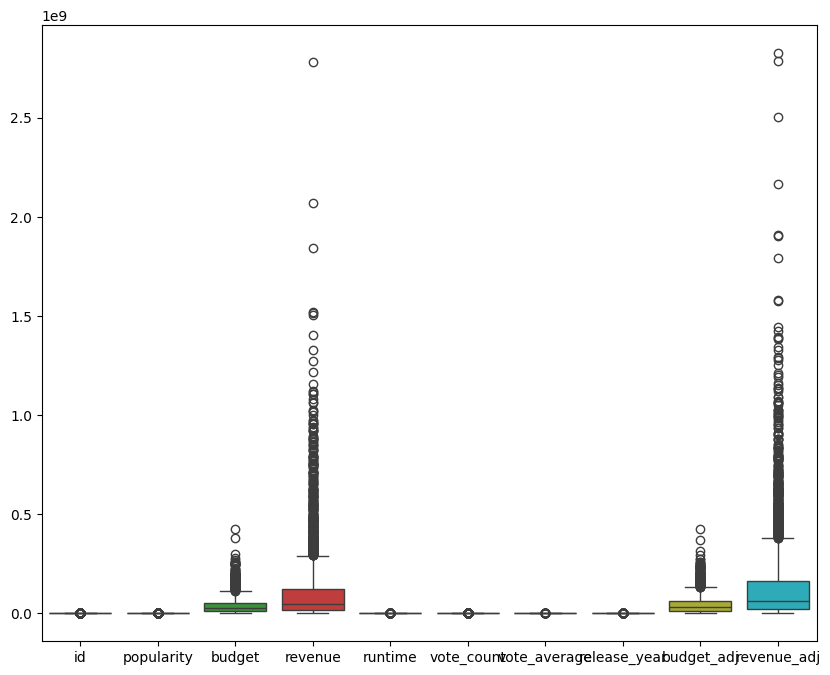

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)

handel outliers

In [14]:
#select only numeric columns
numeric_columns=df.select_dtypes(include=[float,int])
for col in numeric_columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    new_df=df.loc[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
print('befor removing outliers:',len(df))
print('after removing outliers:',len(new_df))
print('outliers :',len(df)- len(new_df))
df=new_df


befor removing outliers: 3848
after removing outliers: 3494
outliers : 354


**# 9.Display Title of The movie Having Runtime >= 300 Minutes**

---



In [15]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [16]:
df[df['runtime']>=300]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
654,43434,tt1321865,0.534192,18000000,871279,Carlos,Edgar Ram?rez|Alexander Scheer|Fadi Abi Samra|...,Olivier Assayas,338,Crime,35,6.2,2010,18000000.0,871279.0


**# 10.In Which Year There was the highest Average Voting**





In [17]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

**# Highest Average Vote by Year:**

In [18]:
highst_average_vote_year=df.groupby('release_year')['vote_average'].mean().idxmax()
highst_average_vote_value=df.groupby('release_year')['vote_average'].mean().max()
print('highst average vote by years:',highst_average_vote_year)
print('highst average vote :',highst_average_vote_value)


highst average vote by years: 1960
highst average vote : 7.525


**# Highest Average Vote by Director:**




In [19]:
highst_average_vote_director=df.groupby('director')['vote_average'].mean().idxmax()
highst_average_vote_value=df.groupby('director')['vote_average'].mean().max()
print('highst average vote by director:',highst_average_vote_director)
print('highst average vote :',highst_average_vote_value)


highst average vote by director: Damien Chazelle
highst average vote : 8.2


**# Highest Average Vote by Genre:**

In [20]:
highst_average_vote_genres=df.groupby('genres')['vote_average'].mean().idxmax()
highst_average_vote_value=df.groupby('genres')['vote_average'].mean().max()
print('highst average vote by genres:',highst_average_vote_genres)
print('highst average vote :',highst_average_vote_value)

highst average vote by genres: Documentary
highst average vote : 6.785714285714286


**#  Highest Average Vote Overall:**

In [21]:
highst_average_vote_value=df['vote_average'].max()
print(f"highest average vote:{highst_average_vote_value}")

highest average vote:8.4


In [22]:
#highest revenue
highestrevenue=df['revenue'].max()
print(f"highest revenue:{highestrevenue}")

highest revenue:403802136


top 5 years according to vote average



In [23]:
#group by release year and calculate avg vote
highst_average_vote_year=df.groupby('release_year')['vote_average'].mean().reset_index()
top5yer=highst_average_vote_year.sort_values(by='vote_average',ascending=False).head(5)


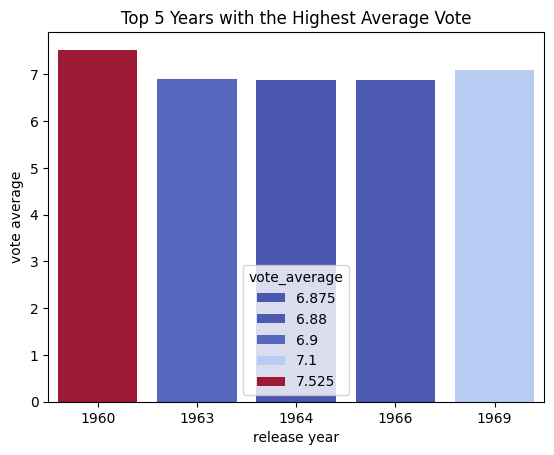

In [25]:
sns.barplot(data=top5yer,x='release_year',y='vote_average',palette='coolwarm',hue='vote_average')
plt.xlabel('release year')
plt.ylabel('vote average')
plt.title('Top 5 Years with the Highest Average Vote')
plt.show()

**# 11.In Which Year There Was The Highest Average Revenue?**

In [26]:
#groupby release year and calculate the mean of revenue
average_revenue_year=df.groupby('release_year')['revenue'].mean().idxmax()
average_revenue_value=df.groupby('release_year')['revenue'].mean().max()
print('  the year with the highst Average revenue:',average_revenue_year)
print('highst average revenue:',average_revenue_value)


  the year with the highst Average revenue: 2014
highst average revenue: 88459925.04054055


**Select top 10 movies based on revenue**

In [27]:
top_10_movie=df.nlargest(10,'revenue')[['original_title','revenue']].set_index('original_title')
top_10_movie

,revenue
original_title,
Kingsman: The Secret Service,403802136
Snow White and the Huntsman,396600000
The Wolf of Wall Street,392000694
Mad Max: Fury Road,378436354
Taken 2,376141306
Penguins of Madagascar,373552094
The Adventures of Tintin,371940071
G.I. Joe: Retaliation,371876278
Terminator Salvation,371353001


/tmp/ipython-input-828263740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_movie['revenue'],y=top_10_movie.index,palette='viridis')


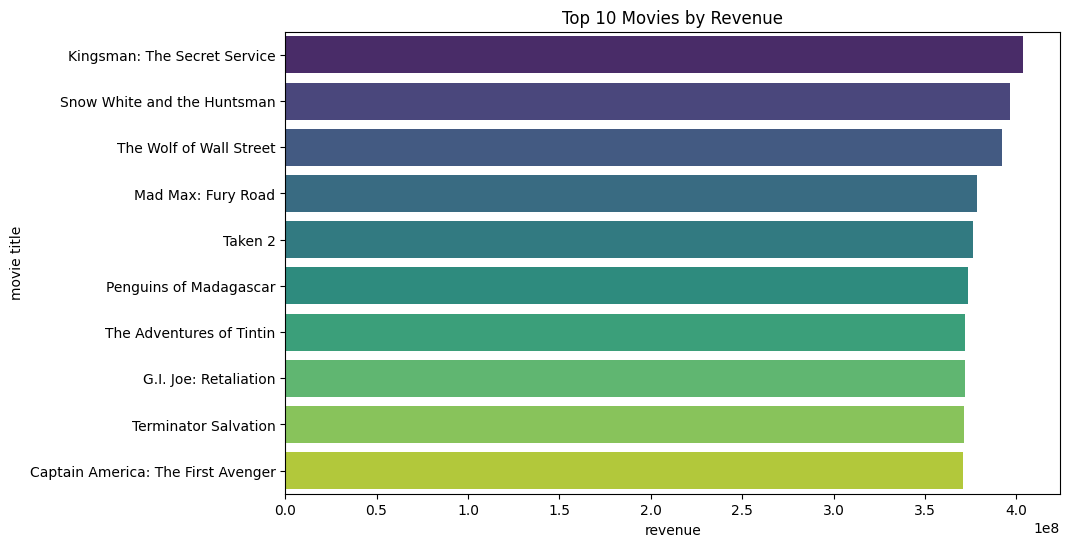

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_movie['revenue'],y=top_10_movie.index,palette='viridis')
plt.xlabel('revenue')
plt.ylabel('movie title')
plt.title('Top 10 Movies by Revenue')
plt.show()

**#.Display Top 10 Lengthy Movies Title and Runtim**

In [29]:
top10_len = df.nlargest(10, 'runtime')[['original_title', 'runtime']].set_index('original_title')


/tmp/ipython-input-574193024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtime', y=top10_len.index, data=top10_len,palette='viridis')


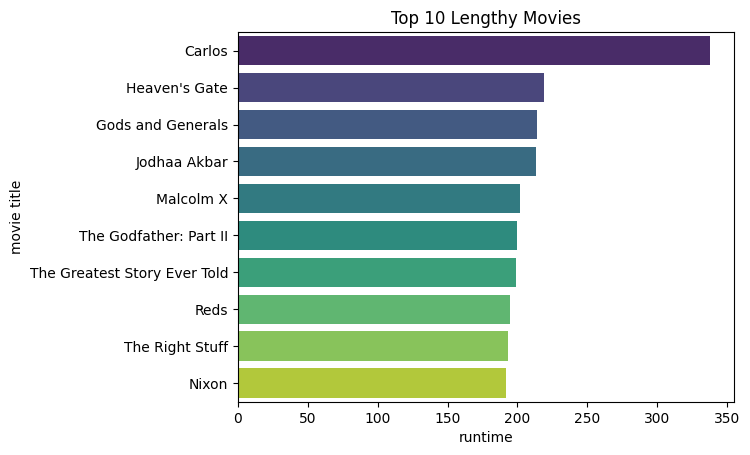

In [30]:

sns.barplot(x='runtime', y=top10_len.index, data=top10_len,palette='viridis')
plt.xlabel('runtime')
plt.ylabel('movie title')
plt.title('Top 10 Lengthy Movies')
plt.show()

**# 14. Display Number of Movies Per Year**

In [31]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [32]:
df['release_year'].value_counts()

,count
release_year,
2011,186
2010,165
2013,164
2009,161
2006,160
2005,153
2008,152
2007,151
2014,148


/tmp/ipython-input-3900084231.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='release_year',palette='viridis')


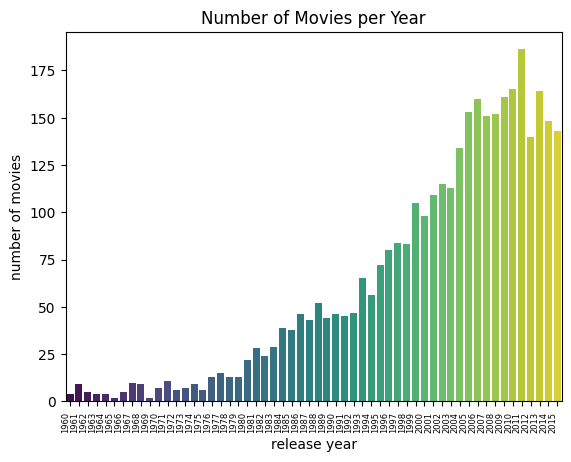

In [33]:
sns.countplot(data=df,x='release_year',palette='viridis')
plt.xlabel('release year')
plt.ylabel('number of movies')
plt.title('Number of Movies per Year')
plt.xticks(rotation=90,ha='right',fontsize=6) #rotate x-
plt.show()

**# 15.Find Most Popular Movie Title(Highes Revenue)**

In [34]:
mostpopular_movie =df.nlargest(1,'revenue')[['original_title','revenue']].set_index('original_title')
mostpopular_movie


,revenue
original_title,
Kingsman: The Secret Service,403802136


**The movie with highest revenue is  (Kingsman:The Secret Service	)**


**16.Does Voting affect Revenue?**

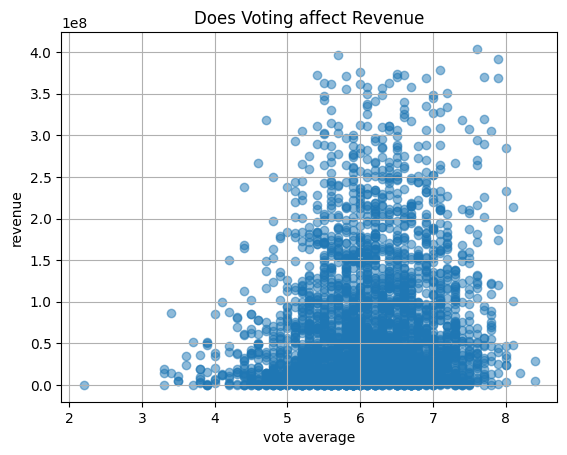

In [35]:
plt.scatter(x=df['vote_average'],y=df['revenue'],alpha=0.5)
plt.xlabel('vote average')
plt.ylabel('revenue')
plt.title('Does Voting affect Revenue')
plt.grid(True)
plt.show()


Average Movie Voting per Year

In [36]:
voting_average_year=df.groupby('release_year')['vote_average'].mean()
voting_average_year

,vote_average
release_year,
1960,7.525000
1961,6.622222
1962,6.820000
1963,6.900000
1964,6.875000
1965,6.150000
1966,6.880000
1967,6.600000
1968,6.655556


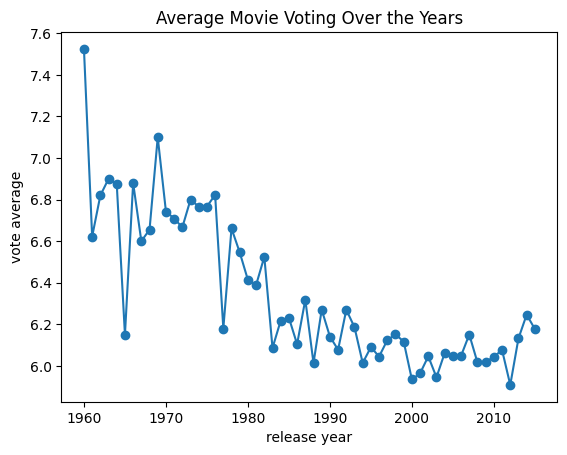

In [37]:
plt.plot(voting_average_year.index,voting_average_year.values,marker='o',linestyle='-')
plt.xlabel('release year')
plt.ylabel('vote average')
plt.title('Average Movie Voting Over the Years')
plt.show()

**17.Find Unique Values From Genre¶**

In [38]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [39]:
x=df['genres'].unique()
x

array(['Action', 'Adventure', 'Science Fiction', 'Drama', 'Crime',
       'Comedy', 'Thriller', 'Fantasy', 'History', 'Romance', 'Mystery',
       'Family', 'Horror', 'Animation', 'War', 'Music', 'Western',
       'Documentary', 'TV Movie'], dtype=object)

In [40]:
value_unique=df['genres'].nunique()
value_unique

19

**18.How many Films of Each Genre were made ?**

In [41]:
v=df['genres'].value_counts()
v


,count
genres,
Drama,850
Comedy,752
Action,609
Horror,272
Adventure,220
Crime,165
Thriller,153
Fantasy,93
Science Fiction,80


/tmp/ipython-input-2251195019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=v.index,y=v.values,palette='viridis')


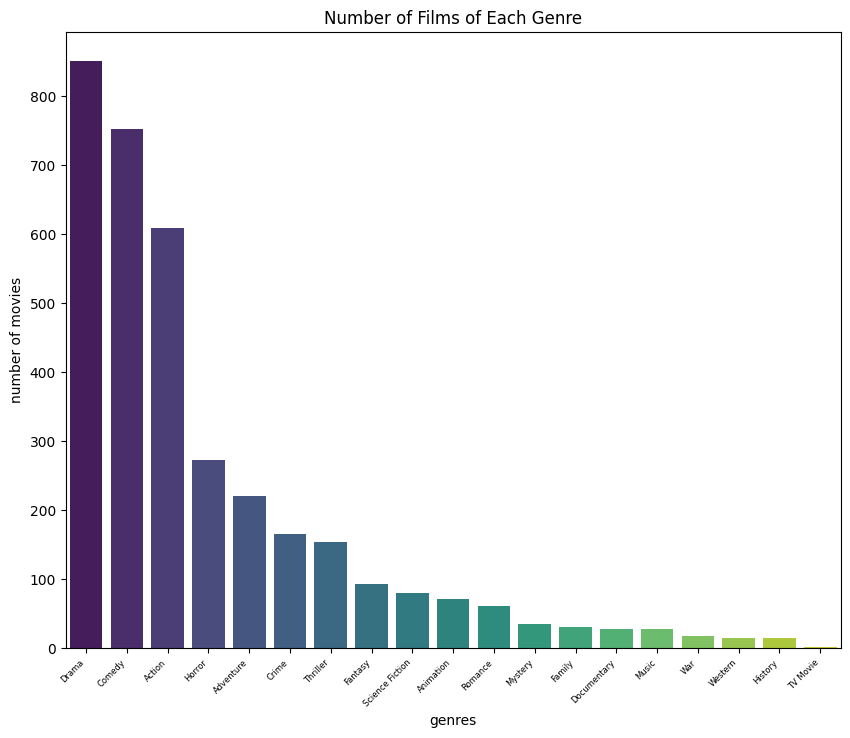

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(x=v.index,y=v.values,palette='viridis')
plt.xlabel('genres')
plt.ylabel('number of movies')
plt.title('Number of Films of Each Genre')
plt.xticks(rotation=45,ha='right',fontsize=6)
plt.show()

**# 19. Is there a relationship between films and revenue**

In [43]:
#number of films per year
number_of_films_peryear=df.groupby('release_year').size()
number_of_films_peryear

,0
release_year,
1960,4
1961,9
1962,5
1963,4
1964,4
1965,2
1966,5
1967,10
1968,9


In [44]:
# total revenue per year
total_revenue_peryear=df.groupby('release_year')['revenue'].sum()
total_revenue_peryear

,revenue
release_year,
1960,69005000
1961,121840174
1962,76729846
1963,39878117
1964,29440821
1965,41950000
1966,84736689
1967,310009136
1968,222221762


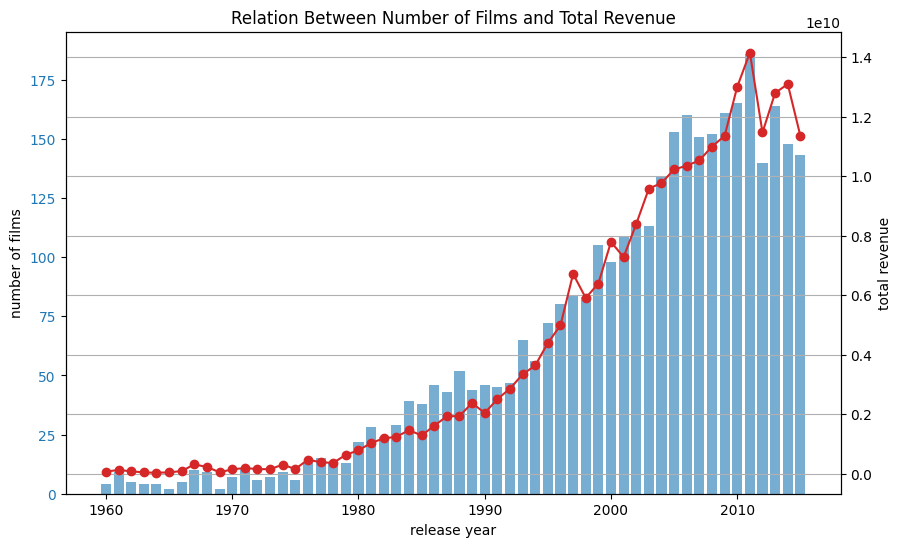

In [45]:
#create a bar plot for the numbers of films and line plot for revenue in same plot
fig, ax1 = plt.subplots(figsize=(10, 6))
color ='tab:blue'
ax1.set_xlabel('release year')
ax1.set_ylabel('number of films')
ax1.bar(number_of_films_peryear.index,number_of_films_peryear.values,color=color, alpha=0.6)
ax1.tick_params(axis='y',labelcolor=color)

#------------------------------------------------------------------------------------------
ax2=ax1.twinx() # create # SECOND Y
color='tab:red'
ax2.set_ylabel('total revenue')
ax2.plot(total_revenue_peryear.index,total_revenue_peryear.values,color=color,marker='o')
plt.title('Relation Between Number of Films and Total Revenue')
plt.grid(True)
plt.show()

**20.what is the Top 10 Directories by voting**

In [46]:
top=df.nlargest(10,'vote_average')[['director','vote_average']].set_index('director')
top

,vote_average
director,
Frank Darabont,8.4
Jonathan Demme,8.4
Damien Chazelle,8.2
David Fincher,8.1
Quentin Tarantino,8.1
Francis Ford Coppola,8.1
Lenny Abrahamson,8.0
Morten Tyldum,8.0
Xavier Dolan,8.0


/tmp/ipython-input-2188350465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top['vote_average'],y=top.index,palette='viridis')


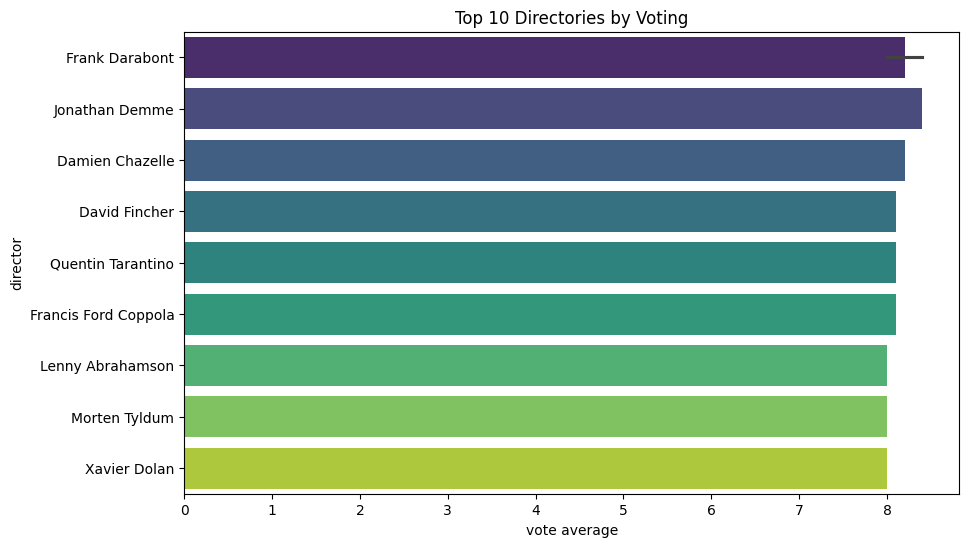

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=top['vote_average'],y=top.index,palette='viridis')
plt.xlabel('vote average')
plt.ylabel('director')
plt.title('Top 10 Directories by Voting')
plt.show()

**21.Top 5 Movies by Revenue**

In [48]:
top5movie_revenue = df.nlargest(5,'revenue')[['original_title','revenue']].set_index('original_title')
top5movie_revenue

,revenue
original_title,
Kingsman: The Secret Service,403802136
Snow White and the Huntsman,396600000
The Wolf of Wall Street,392000694
Mad Max: Fury Road,378436354
Taken 2,376141306


/tmp/ipython-input-868780836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5movie_revenue,x='revenue',y=top5movie_revenue.index,palette='viridis')


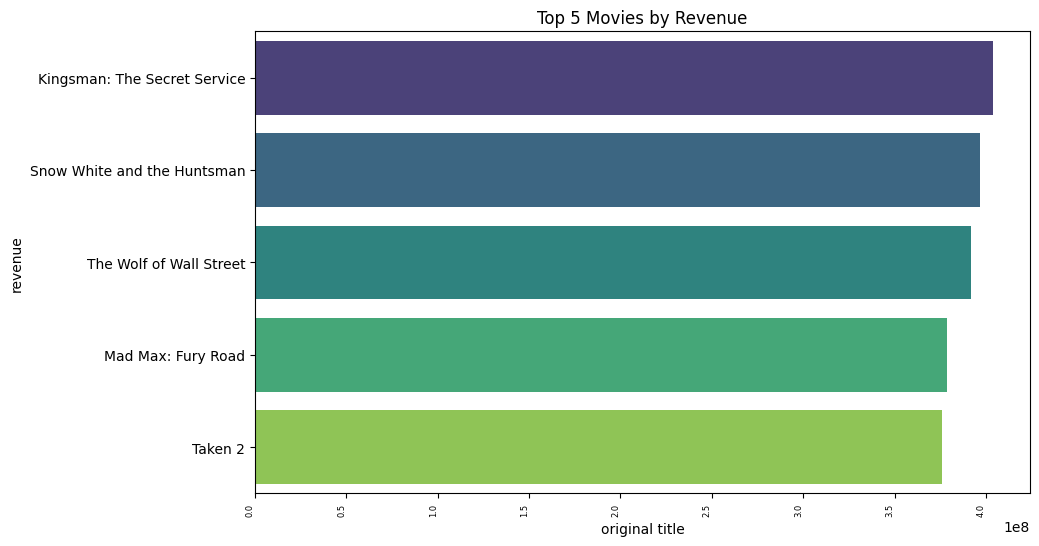

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(data=top5movie_revenue,x='revenue',y=top5movie_revenue.index,palette='viridis')
plt.xlabel('original title')
plt.ylabel('revenue')
plt.title('Top 5 Movies by Revenue')
plt.xticks(rotation=90,ha='right',fontsize=6)
plt.show()

**Top 10 Years with the Highest Average Revenue**

In [50]:

total_revenue_peryear=df.groupby('release_year')['revenue'].sum().sort_values(ascending=False).head(10)
total_revenue_peryear

,revenue
release_year,
2011,14146082089
2014,13092068906
2010,13000741833
2013,12793857782
2012,11465333747
2009,11351124311
2015,11349749173
2008,10992719363
2007,10527208518


/tmp/ipython-input-241634515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_revenue_peryear.index,y=total_revenue_peryear.values,palette='viridis')


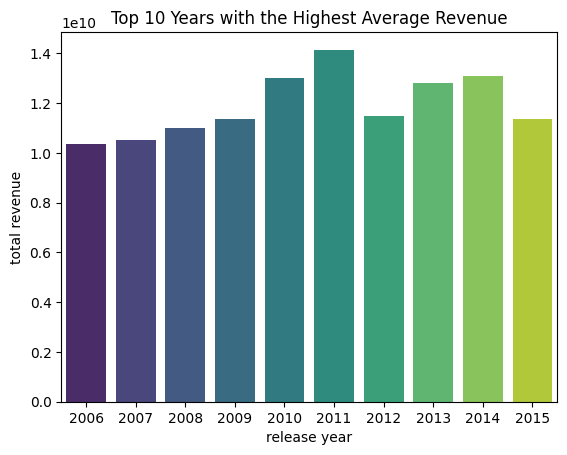

In [51]:
sns.barplot(x=total_revenue_peryear.index,y=total_revenue_peryear.values,palette='viridis')
plt.xlabel('release year')
plt.ylabel('total revenue')
plt.title('Top 10 Years with the Highest Average Revenue')
plt.show()

/tmp/ipython-input-1668427360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_revenue_peryear.index,y=total_revenue_peryear.values,palette='coolwarm')
/tmp/ipython-input-1668427360.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5yer,x='release_year',y='vote_average',palette='coolwarm')
/tmp/ipython-input-1668427360.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='release_year',palette='viridis')


-------------------------------------------------------------------



/tmp/ipython-input-1668427360.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_movie['revenue'],y=top_10_movie.index,palette='viridis')
/tmp/ipython-input-1668427360.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtime', y=top10_len.index, data=top10_len,palette='viridis')
/tmp/ipython-input-1668427360.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5movie_revenue,x='revenue',y=top5movie_revenue.index,palette='viridis')
/tmp/ipython-input-1668427360.py:100: FutureWarning: 

Passing `palette` without assig

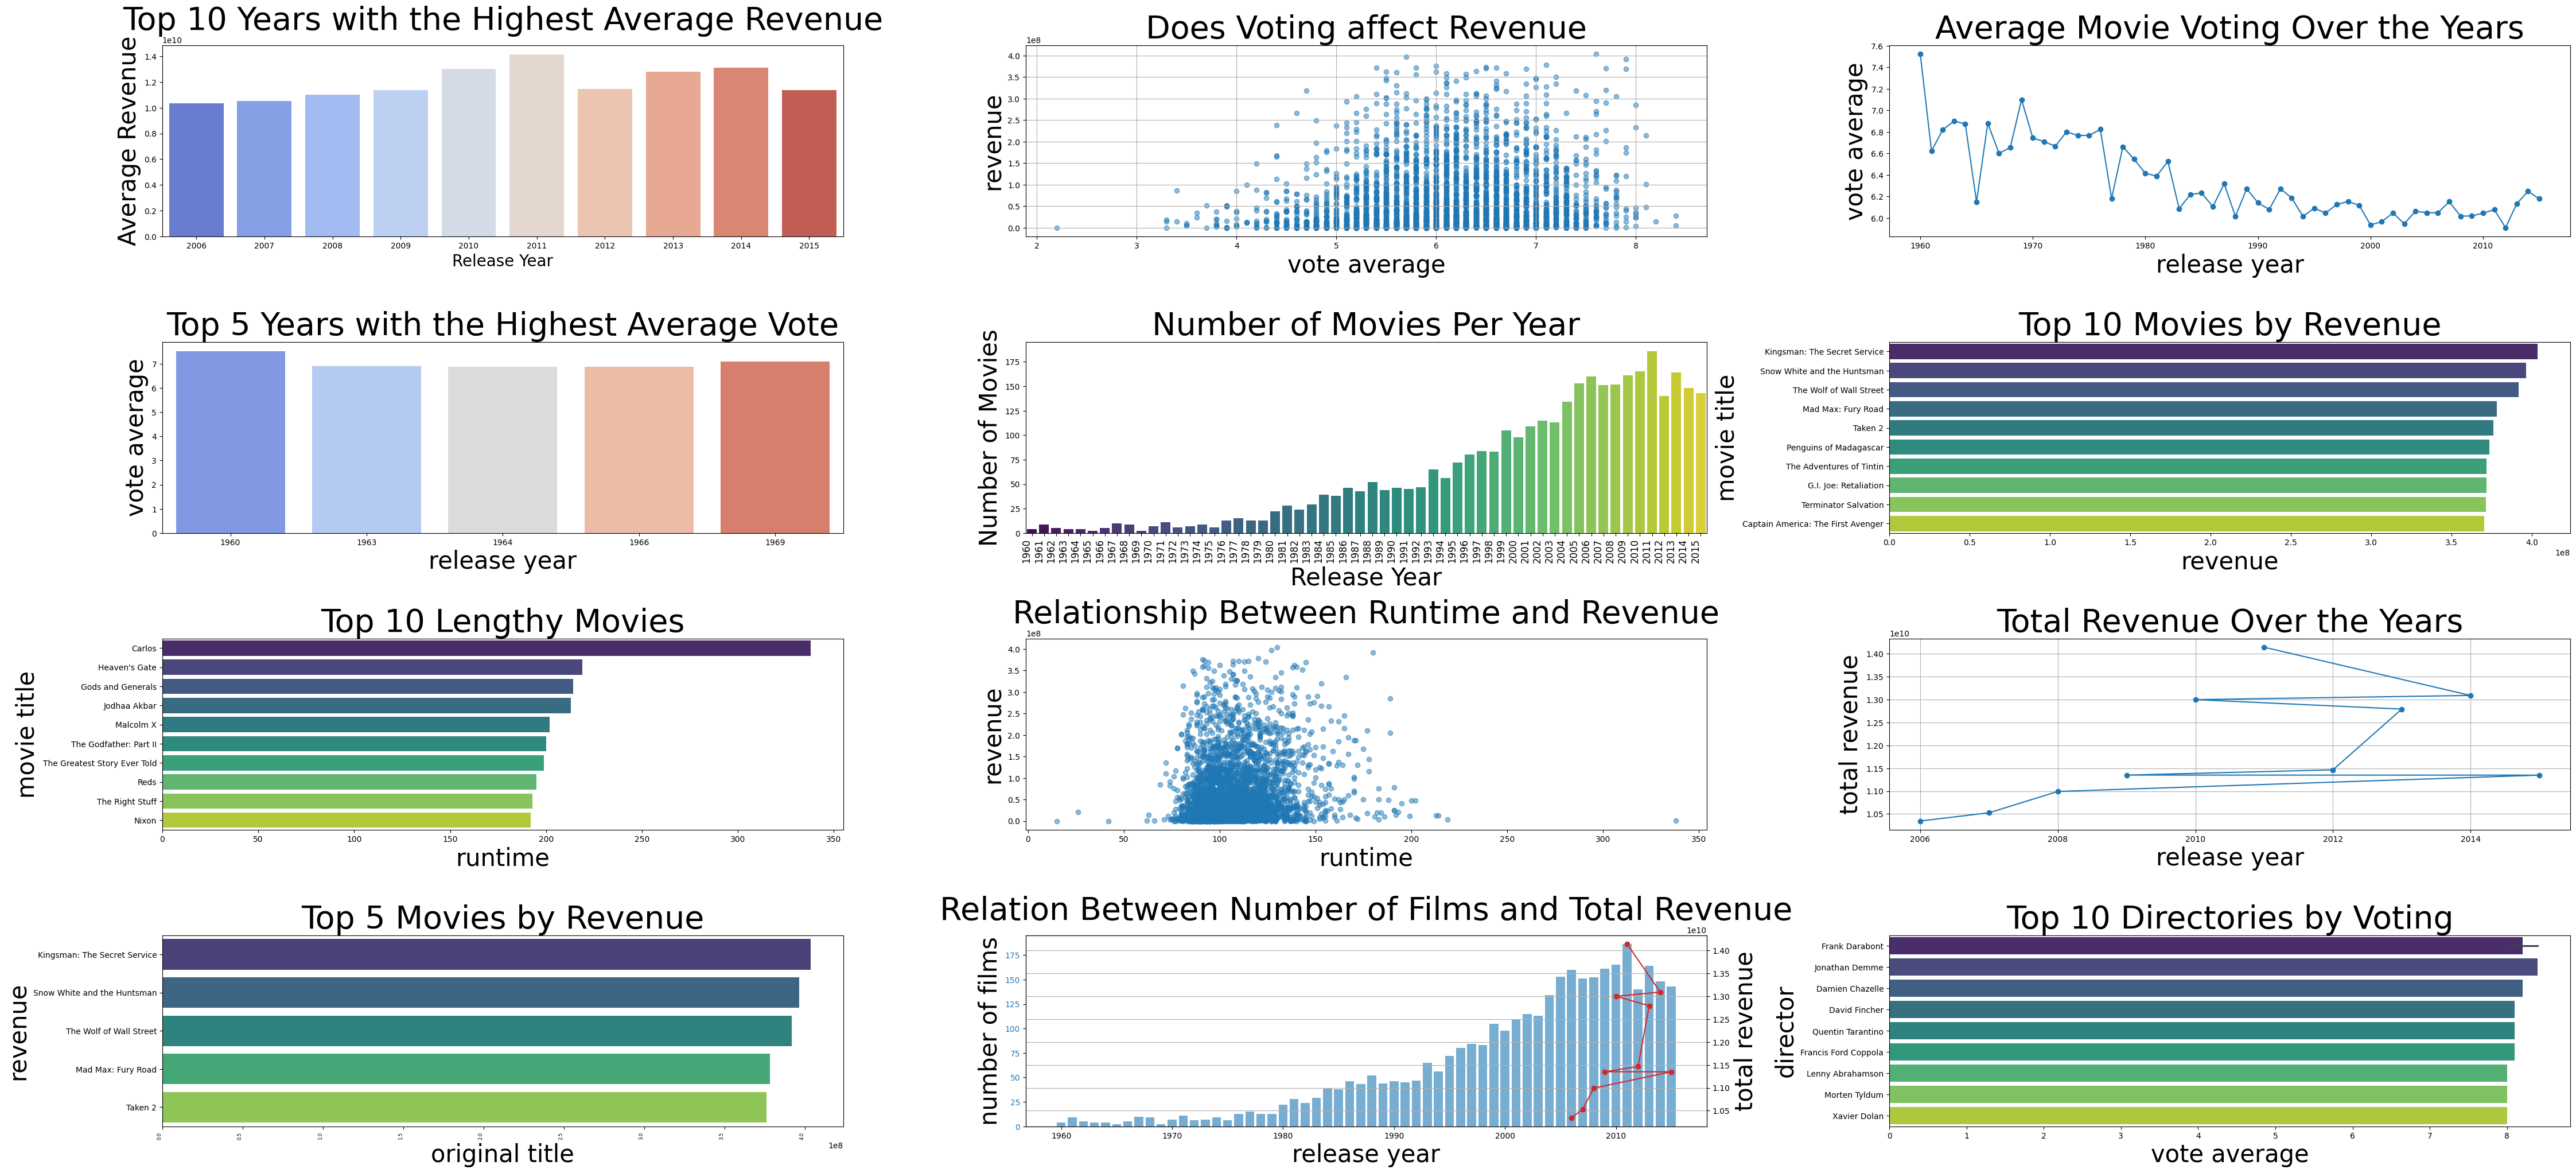

In [52]:
#create dashboard
# Create a figure with multiple subplots
plt.figure(figsize=(45, 25))  # Adjust the size to fit all subplots
# Subplot 1: Top 10 Years with the Highest Average Revenue
plt.subplot(5, 3, 1)
sns.barplot(x=total_revenue_peryear.index,y=total_revenue_peryear.values,palette='coolwarm')
plt.title("Top 10 Years with the Highest Average Revenue", fontsize=40)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Average Revenue", fontsize=30)
#---------------------------------------------------------------------------------
#sup plot 2
#voting VS revenue
plt.subplot(5, 3, 2)
plt.scatter(x=df['vote_average'],y=df['revenue'],alpha=0.5)
plt.xlabel('vote average',fontsize=30)
plt.ylabel('revenue',fontsize=30)
plt.title('Does Voting affect Revenue',fontsize=40)
plt.grid(True)
#---------------------------------------------------------------------------------
# Subplot 3: Average Movie Voting Over the Years
plt.subplot(5, 3, 3)
plt.plot(voting_average_year.index,voting_average_year.values,marker='o',linestyle='-')
plt.xlabel('release year',fontsize=30)
plt.ylabel('vote average',fontsize=30)
plt.title('Average Movie Voting Over the Years',fontsize=40)
print("-------------------------------------------------------------------\n")
#---------------------------------------------------------------------------------
# Subplot 4: Top 5 Years with the Highest Average Votes

plt.subplot(5, 3, 4)
sns.barplot(data=top5yer,x='release_year',y='vote_average',palette='coolwarm')
plt.xlabel('release year',fontsize=30)
plt.ylabel('vote average',fontsize=30)
plt.title('Top 5 Years with the Highest Average Vote',fontsize=40)
#---------------------------------------------------------------------------------
# Subplot 5: Number of Movies Per Year
plt.subplot(5, 3, 5)
sns.countplot(data=df,x='release_year',palette='viridis')
plt.title("Number of Movies Per Year", fontsize=40)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.xlabel("Release Year", fontsize=30)
plt.ylabel("Number of Movies", fontsize=30)
#---------------------------------------------------------------------------------
# Subplot 6: Top 10 Movies by Revenue
plt.subplot(5, 3, 6)
sns.barplot(x=top_10_movie['revenue'],y=top_10_movie.index,palette='viridis')
plt.xlabel('revenue',fontsize=30)
plt.ylabel('movie title',fontsize=30)
plt.title('Top 10 Movies by Revenue',fontsize=40)
#------------------------------------------------------------------------------------------
# Subplot 7: Top 10 Movies by Length
plt.subplot(5, 3, 7)
sns.barplot(x='runtime', y=top10_len.index, data=top10_len,palette='viridis')
plt.xlabel('runtime',fontsize=30)
plt.ylabel('movie title',fontsize=30)
plt.title('Top 10 Lengthy Movies',fontsize=40)
#--------------------------------------------------------------------------------------------------
# Subplot 8: Relationship Between Runtime and Revenue
plt.subplot(5, 3, 8)
plt.scatter(x=df['runtime'],y=df['revenue'],alpha=0.5)
plt.xlabel('runtime',fontsize=30)
plt.ylabel('revenue',fontsize=30)
plt.title('Relationship Between Runtime and Revenue',fontsize=40)
#-----------------------------------------------------------------------------------------------------
# Subplot 9: Total Revenue Over the Years
plt.subplot(5, 3, 9)
plt.plot(total_revenue_peryear.index,total_revenue_peryear.values,marker='o', linestyle='-')
plt.xlabel('release year',fontsize=30)
plt.ylabel('total revenue',fontsize=30)
plt.title('Total Revenue Over the Years',fontsize=40)
plt.grid(True)
#--------------------------------------------------------------------------------------------------------
# Subplot 10: top 5 movie by revenue
plt.subplot(5, 3, 10)
sns.barplot(data=top5movie_revenue,x='revenue',y=top5movie_revenue.index,palette='viridis')
plt.xlabel('original title',fontsize=30)
plt.ylabel('revenue',fontsize=30)
plt.title('Top 5 Movies by Revenue',fontsize=40)
plt.xticks(rotation=90,ha='right',fontsize=6)
#-----------------------------------------------------------------------------------------------------------
# Subplot 11: Relation Between Number of Films and Revenue
plt.subplot(5, 3, 11)
#numer of films per year
color ='tab:blue'
ax1 = plt.gca()
ax1.set_xlabel('release year',fontsize=30)
ax1.set_ylabel('number of films',fontsize=30)
ax1.bar(number_of_films_peryear.index,number_of_films_peryear.values,color=color, alpha=0.6)
ax1.tick_params(axis='y',labelcolor=color)
#total revenue per year
ax2=ax1.twinx()
color='tab:red'
ax2.set_ylabel('total revenue',fontsize=30)
ax2.plot(total_revenue_peryear.index,total_revenue_peryear.values,color=color,marker='o')
plt.title('Relation Between Number of Films and Total Revenue',fontsize=40)
plt.grid(True)
#------------------------------------------------------------------------------------------------------
# Subplot 12: Top 10 Directors by Average Voting
plt.subplot(5, 3, 12)
sns.barplot(x=top['vote_average'],y=top.index,palette='viridis')
plt.xlabel('vote average',fontsize=30)
plt.ylabel('director',fontsize=30)
plt.title('Top 10 Directories by Voting',fontsize=40)
#------------------------------------------------------------------------
plt.tight_layout()
plt.show()

**# Conclusion**

1- voting affecting revenue when voting increase, revenue increase << so we need to increase voting


--------------------------------------------------------------------------------

2- The director who has the largest average vote:
Damien Chazelle, Average Vote: 8.2

--------------------------------------------------------------------------------

3- Highest average vote by genre: Documentary, Average vote:6.7

--------------------------------------------------------------------------------

4- increasing the number of runtime increase the revenue

--------------------------------------------------------------------------------

5- increasing the number of films increase the revenue

--------------------------------------------------------------------------------

6-the top 10 movie based on revenue:


1.   Kingsman: The Secret Service	:  403802136

1.   Snow White and the Huntsman	:  396600000

1.   The Wolf of Wall Street	     :  392000694

1.   Mad Max: Fury Road	           :   378436354

1.  Taken 2	                        :   376141306
2.   Penguins of Madagascar	        :  373552094


3.   The Adventures of Tintin	       :  371940071


4.   G.I. Joe: Retaliation	          :  371876278


5.   Terminator Salvation	             :  371353001


6.   Captain America: The First Avenger	:  370569774




--------------------------------------------------------------------------------

7- The year that has highest Average vote is : 1960 year , 7.5 vote


--------------------------------------------------------------------------------

8- Drama films has the highest number of films   then(comedy, Action,Horror, Adventure)


--------------------------------------------------------------------------------

9- The larges runtime film is 338 min:

*   name : Carlos
*   director: Olivier Assayas

*   genre: Crime







--------------------------------------------------------------------------------

10- The highest average vote Overall:   8.4


--------------------------------------------------------------------------------

11-the year that has the highes avergae revenue: 2014 with revenue of 88459925


--------------------------------------------------------------------------------

12- highest revenue: 403802136

--------------------------------------------------------------------------------

13- the voting of films decrease when year increase
